# Révision - Analyse de données sur les ventes de meubles et fournitures de bureau

# 0 - contexte et objectifs

Vous commencez votre mission en tant que Data Analyst chez une enseigne de Retail. On vous a donné accès à leur base de données pour analyse exploratoire : Produits, clients et ventes.
Vous travaillez au service marketing , vous intervenez car l’entreprise souhaite faire le point : analyser ses points forts, ses points faibles, les comportements clients, etc. 

Par exemple, elle cherche à savoir si elle doit créer certaines offres, adapter certains prix, etc.

On vous demande de faire une analyse en deux parties :

Partie I - analyse des différents indicateurs généraux

    Construire des indicateurs et graphiques autour du chiffre d'affaires. Regarder l’évolution dans le temps
    
    faire un zoom sur les références, pour voir les tops et les flops, la répartition par catégorie, etc.
    
    etudier les profils des clients, et également la répartition du chiffre d'affaires entre eux

Partie II - comportement des clients l’objectif est cette fois-ci de comprendre le comportement des clients en ligne.

    étudier le lien entre le genre d’un client et les catégories des livres achetés
    
    étudier ensuite le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.



# 1 - Exploration et  nettoyage des données 

In [1]:
# Import de la librairie Pandas
import pandas as pd

# Import de la librairie matplotlib
import matplotlib.pyplot as plt

# Import de la librairie matplotlib pour les graphiques à lire dans la ligne
%matplotlib inline

# Import de seaborn pour des graphiques plus esthétiques
import seaborn as sns


## 1.1 - Chargement des données

Si vous utilisez anaconda -> je vous conseille de mettre les fichiers csv dans le même répertoire que le notebook

Si vous utilisez google colab ->  il faut exécuter le code ci-dessous. 

from google.colab import files
data_to_load = files.upload()

### 1.1.1 - customers

In [2]:
# Ouverture du fichier
SuperStoreData = pd.read_csv('superstoredata.csv', encoding='utf-8', encoding_errors='ignore', sep=';')

In [3]:
# Affichage des informations 
SuperStoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            9994 non-null   object 
 1   order_date          9994 non-null   object 
 2   ship_date           9994 non-null   object 
 3   ship_mode           9994 non-null   object 
 4   customer_id         9994 non-null   object 
 5   sales_rep           9994 non-null   object 
 6   location_id         9993 non-null   object 
 7   product_id          9994 non-null   object 
 8   sales               9994 non-null   float64
 9   quantity            9994 non-null   int64  
 10  discount            9994 non-null   float64
 11  profit              9994 non-null   float64
 12  customer_name       9994 non-null   object 
 13  segment             9994 non-null   object 
 14  product_name        9994 non-null   object 
 15  category            9994 non-null   object 
 16  sub_ca

In [4]:
# Affichage des premières lignes

SuperStoreData.head()

,order_id,order_date,ship_date,ship_mode,customer_id,sales_rep,location_id,product_id,sales,quantity,...,product_name,category,sub_category,sales_team,sales_team_manager,city,state,postal_code,region,Unnamed: 23
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Organic,"42420,Henderson",FUR-BO-10001798,261.96,2,...,Bush Somerset Collection Bookcase,Furniture,Bookcases,Organic,Organic,Henderson,Kentucky,42420,South,NaN
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Organic,"42420,Henderson",FUR-CH-10000454,731.94,3,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,Organic,Organic,Henderson,Kentucky,42420,South,NaN
2,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Steve Pepple,"90036,Los Angeles",OFF-LA-10000240,14.62,2,...,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,Bravo,Tracy Banks,Los Angeles,California,90036,West,NaN
3,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Organic,"33311,Fort Lauderdale",FUR-TA-10000577,957.58,5,...,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,Organic,Organic,Fort Lauderdale,Florida,33311,South,NaN
4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Organic,"33311,Fort Lauderdale",OFF-ST-10000760,22.37,2,...,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,Organic,Organic,Fort Lauderdale,Florida,33311,South,NaN


In [5]:
# Stats du dataframe
SuperStoreData.describe(include = 'all')

,order_id,order_date,ship_date,ship_mode,customer_id,sales_rep,location_id,product_id,sales,quantity,...,product_name,category,sub_category,sales_team,sales_team_manager,city,state,postal_code,region,Unnamed: 23
count,9994,9994,9994,9994,9994,9994,9993,9994,9994.000000,9994.000000,...,9994,9994,9994,9994,9994,9994,9992,9994,9994,6
unique,5009,1237,1334,4,794,14,632,1863,NaN,NaN,...,1818,4,18,6,7,534,54,635,9,3
top,CA-2017-100111,05/09/2016,16/12/2015,Standard Class,WB-21850,Organic,"10035,New York City",OFF-PA-10001970,NaN,NaN,...,Staple envelope,Office Supplies,Binders,Organic,Organic,New York City,California,10035,West,Central
freq,14,38,35,5968,37,6400,263,19,NaN,NaN,...,48,6026,1523,6397,6400,915,1999,263,3203,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.838886,3.789574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.252189,2.225110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-95.620000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.257500,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.430000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ce fichier comprend 3 colonnes :

    Client_id : référence de chaque client
    Sex : le genre du client
    Birth : l'année de naissance du client



In [6]:
print(SuperStoreData)

            order_id  order_date   ship_date       ship_mode customer_id  \
0     CA-2016-152156  08/11/2016  11/11/2016    Second Class    CG-12520   
1     CA-2016-152156  08/11/2016  11/11/2016    Second Class    CG-12520   
2     CA-2016-138688  12/06/2016  16/06/2016    Second Class    DV-13045   
3     US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   
4     US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   
...              ...         ...         ...             ...         ...   
9989  CA-2014-110422  21/01/2014  23/01/2014    Second Class    TB-21400   
9990  CA-2017-121258  26/02/2017  03/03/2017  Standard Class    DB-13060   
9991  CA-2017-121258  26/02/2017  03/03/2017  Standard Class    DB-13060   
9992  CA-2017-121258  26/02/2017  03/03/2017  Standard Class    DB-13060   
9993  CA-2017-119914  04/05/2017  09/05/2017    Second Class    CC-12220   

         sales_rep            location_id       product_id   sales  quantity  \
0      

In [7]:
#valeurs manquantes
SuperStoreData.isna().mean()

order_id              0.0000
order_date            0.0000
ship_date             0.0000
ship_mode             0.0000
customer_id           0.0000
sales_rep             0.0000
location_id           0.0001
product_id            0.0000
sales                 0.0000
quantity              0.0000
discount              0.0000
profit                0.0000
customer_name         0.0000
segment               0.0000
product_name          0.0000
category              0.0000
sub_category          0.0000
sales_team            0.0000
sales_team_manager    0.0000
city                  0.0000
state                 0.0002
postal_code           0.0000
region                0.0000
Unnamed: 23           0.9994
dtype: float64

In [8]:
SuperStoreData.isna().sum()

order_id                 0
order_date               0
ship_date                0
ship_mode                0
customer_id              0
sales_rep                0
location_id              1
product_id               0
sales                    0
quantity                 0
discount                 0
profit                   0
customer_name            0
segment                  0
product_name             0
category                 0
sub_category             0
sales_team               0
sales_team_manager       0
city                     0
state                    2
postal_code              0
region                   0
Unnamed: 23           9988
dtype: int64

In [13]:
# Analyse de la colonne 'Unnamed: 23'
print(SuperStoreData['Unnamed: 23'].value_counts(dropna=False))

Unnamed: 23
NaN        9988
Central       3
South         2
East          1
Name: count, dtype: int64


In [14]:
# Suppression de la colonne 'Unnamed: 23' car elle contient 99,88 % de valeurs manquantes
SuperStoreData = SuperStoreData.drop(columns=['Unnamed: 23'])

In [15]:
# Analyse de la colonne 'location_id'
print(SuperStoreData[SuperStoreData['location_id'].isna()])

          order_id  order_date   ship_date     ship_mode customer_id  \
18  CA-2014-143336  27/08/2014  01/09/2014  Second Class    ZD-21925   

   sales_rep location_id       product_id  sales  quantity  ...   segment  \
18   Organic         NaN  OFF-AR-10003056   8.56         2  ...  Consumer   

    product_name         category sub_category sales_team sales_team_manager  \
18    Newell 341  Office Supplies          Art    Organic            Organic   

             city       state postal_code region  
18  San Francisco  California       94109   West  

[1 rows x 23 columns]


In [ ]:
# Si une table de correspondance existe (ex. postal_code -> location_id => on peut l'utiliser pour remplir les valeurs manquantes)
dict_zip_to_location = {'94109': 'LOC_SF'}  # Selon mes données
SuperStoreData['location_id'] = SuperStoreData['location_id'].fillna(SuperStoreData['postal_code'].map(dict_zip_to_location))
# Sinon, marquer comme 'Unknown'
SuperStoreData['location_id'] = SuperStoreData['location_id'].fillna('Unknown')

Solution pragmatique : Marquer comme "Unknown" est une solution rapide et sûre car aucune correspondance n’est disponible, permettant de continuer l’analyse sans introduire de biais.

In [17]:
# Analyse de la colonne 'state'
print(SuperStoreData[SuperStoreData['state'].isna()])

         order_id  order_date   ship_date       ship_mode customer_id  \
5  CA-2014-115812  09/06/2014  14/06/2014  Standard Class    BH-11710   
6  CA-2014-115812  09/06/2014  14/06/2014  Standard Class    BH-11710   

  sales_rep        location_id       product_id  sales  quantity  ...  \
5   Organic  90032,Los Angeles  FUR-FU-10001487  48.86         7  ...   
6   Organic  90032,Los Angeles  OFF-AR-10002833   7.28         4  ...   

    segment                                       product_name  \
5  Consumer  Eldon Expressions Wood and Plastic Desk Access...   
6  Consumer                                         Newell 322   

          category sub_category sales_team sales_team_manager         city  \
5        Furniture  Furnishings    Organic            Organic  Los Angeles   
6  Office Supplies          Art    Organic            Organic  Los Angeles   

  state postal_code region  
5   NaN       90032   West  
6   NaN       90032   West  

[2 rows x 23 columns]


Pourquoi ? Les deux lignes ont city=Los Angeles et postal_code=90032, qui correspondent à l’état de Californie. L’imputation basée sur ces informations est précise et préserve les données utiles (ex. sales, profit) pour l’analyse. Supprimer les lignes risquerait de perdre des informations valides, et marquer comme "Unknown" serait moins informatif vu que l’état peut être déduit avec certitude.

In [18]:
# Que faire ? Imputer la valeur manquante dans state avec "California" pour les deux lignes :
SuperStoreData['state'] = SuperStoreData['state'].fillna('California')

Vérification de l’intégrité des données après traitement

In [19]:
print(SuperStoreData.isna().sum())

order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
sales_rep             0
location_id           0
product_id            0
sales                 0
quantity              0
discount              0
profit                0
customer_name         0
segment               0
product_name          0
category              0
sub_category          0
sales_team            0
sales_team_manager    0
city                  0
state                 0
postal_code           0
region                0
dtype: int64


In [9]:
#Doublon
SuperStoreData.duplicated().sum()

np.int64(1)

Identifier la ou les lignes dupliquées

In [20]:
print(SuperStoreData[SuperStoreData.duplicated(keep=False)])

            order_id  order_date   ship_date       ship_mode customer_id  \
3409  US-2014-150119  23/04/2014  27/04/2014  Standard Class    LB-16795   
3410  US-2014-150119  23/04/2014  27/04/2014  Standard Class    LB-16795   

     sales_rep     location_id       product_id   sales  quantity  ...  \
3409   Organic  43229,Columbus  FUR-CH-10002965  281.37         2  ...   
3410   Organic  43229,Columbus  FUR-CH-10002965  281.37         2  ...   

          segment                                       product_name  \
3409  Home Office  Global Leather Highback Executive Chair with P...   
3410  Home Office  Global Leather Highback Executive Chair with P...   

       category sub_category sales_team sales_team_manager      city state  \
3409  Furniture       Chairs    Organic            Organic  Columbus  Ohio   
3410  Furniture       Chairs    Organic            Organic  Columbus  Ohio   

     postal_code region  
3409       43229   East  
3410       43229   East  

[2 rows x 23 colu

Supprimer le doublon est approprié pour éviter de fausser les analyses (ex. surestimation des ventes ou du profit). Aucune information unique ne serait perdue, car les lignes sont rigoureusement identiques.

In [21]:
SuperStoreData = SuperStoreData.drop_duplicates(keep='first')

In [10]:
print("Il y a", SuperStoreData.describe(include = 'all').loc["unique","customer_id"], "clients uniques")

Il y a 794 clients uniques


Données après ces traitements

In [22]:
print(SuperStoreData.isna().sum())

order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
sales_rep             0
location_id           0
product_id            0
sales                 0
quantity              0
discount              0
profit                0
customer_name         0
segment               0
product_name          0
category              0
sub_category          0
sales_team            0
sales_team_manager    0
city                  0
state                 0
postal_code           0
region                0
dtype: int64


Visualisations

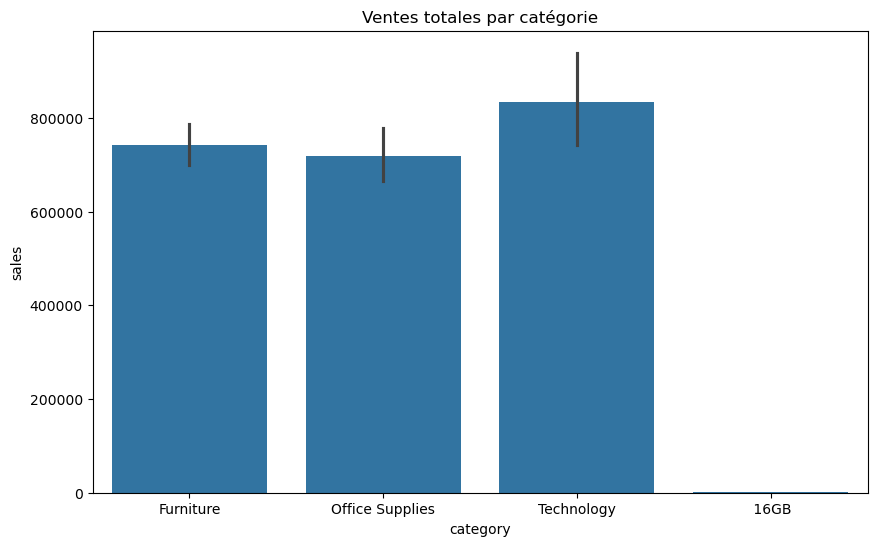

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='sales', data=SuperStoreData, estimator=sum)
plt.title('Ventes totales par catégorie')
plt.show()

In [24]:
print(SuperStoreData[['sales', 'profit', 'quantity']].describe())

              sales       profit     quantity
count   9993.000000  9993.000000  9993.000000
mean     229.833730    28.661048     3.789753
std      623.283162   234.271571     2.225149
min      -95.620000 -6599.980000     1.000000
25%       17.250000     1.730000     2.000000
50%       54.380000     8.670000     3.000000
75%      209.940000    29.360000     5.000000
max    22638.480000  8399.980000    14.000000


Histogramme pour sales

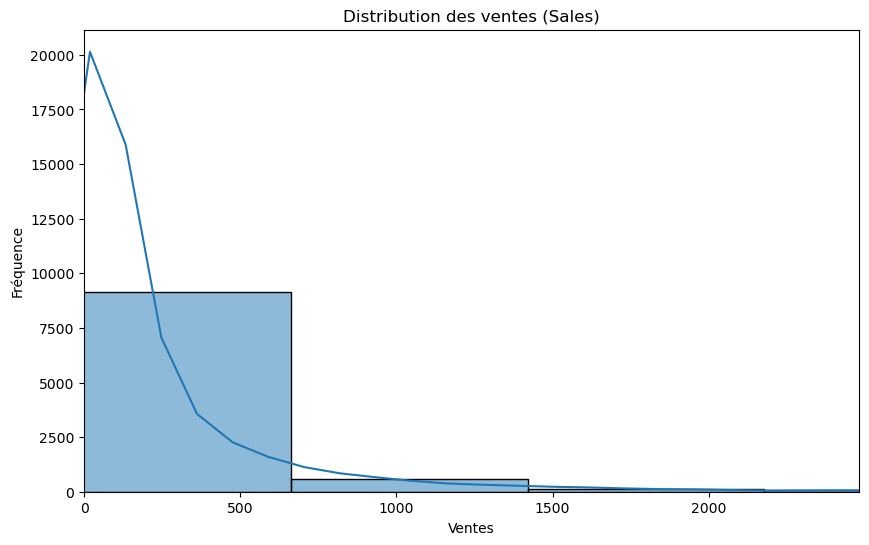

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(SuperStoreData['sales'], bins=30, kde=True)
plt.title('Distribution des ventes (Sales)')
plt.xlabel('Ventes')
plt.ylabel('Fréquence')
plt.xlim(0, SuperStoreData['sales'].quantile(0.99))  # Limiter pour zoomer sur 99% des données
plt.show()

Pourquoi ? L’histogramme montre l’asymétrie et les valeurs extrêmes. La limite à 99 % exclut les outliers pour une meilleure lisibilité.

In [12]:
#print("L'age moyen des clients est :", 2022- round(SuperStoreData.describe(include = 'all').loc["mean","birth"]), "ans")

Boxplot pour profits _ Pourquoi ? Le boxplot mettra en évidence les profits négatifs et les outliers, aidant à identifier les transactions problématiques.

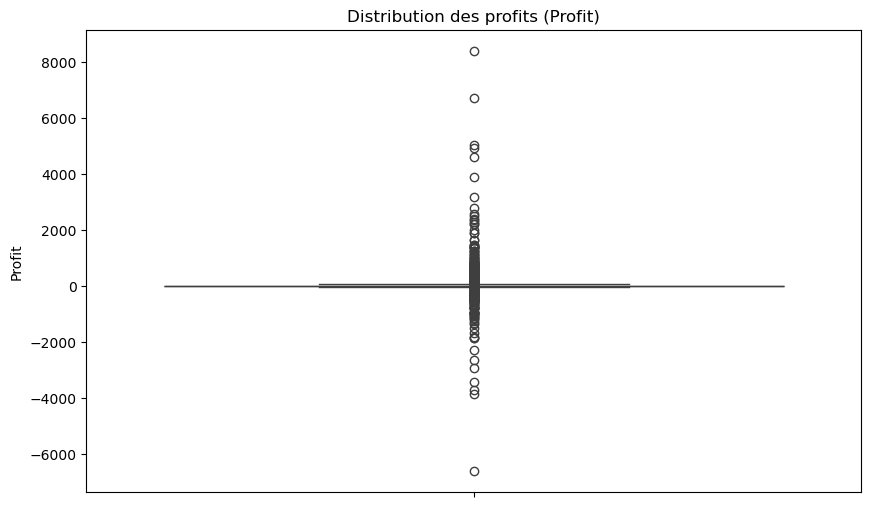

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=SuperStoreData['profit'])
plt.title('Distribution des profits (Profit)')
plt.ylabel('Profit')
plt.show()

Countplot pour quantity _ Pourquoi ? Comme quantity est discrète (entiers), un countplot est plus adapté qu’un histogramme pour voir les fréquences exactes.

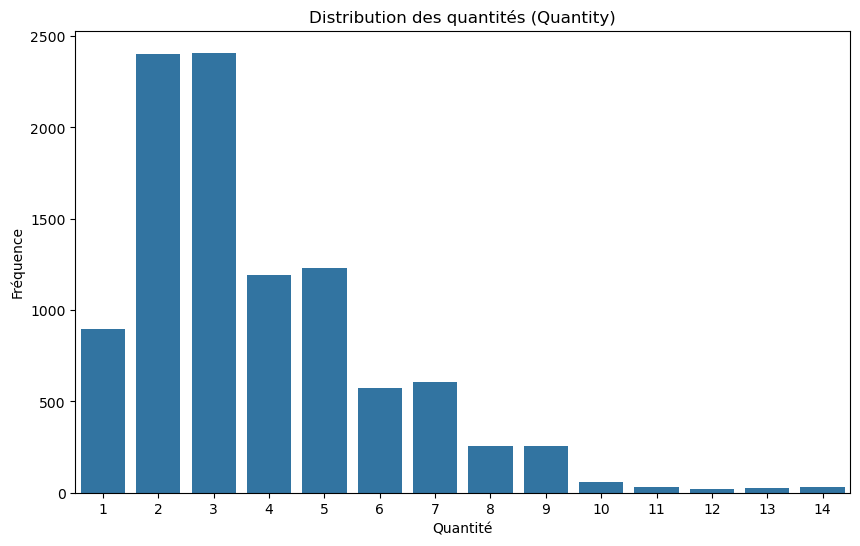

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x=SuperStoreData['quantity'])
plt.title('Distribution des quantités (Quantity)')
plt.xlabel('Quantité')
plt.ylabel('Fréquence')
plt.show()

Ventes par régions

In [28]:
print(SuperStoreData.groupby('region')['sales'].sum())

region
19143         116.78
28052         700.70
60623         408.74
62521         408.74
74133         291.96
Central    500130.44
East       678383.21
South      390829.96
West       725457.93
Name: sales, dtype: float64


In [29]:
# ces régions "numériques"
print(SuperStoreData[SuperStoreData['region'].isin(['19143', '28052', '60623', '62521', '74133'])])

            order_id  order_date   ship_date       ship_mode customer_id  \
181   CA-2014-166191  05/12/2014  09/12/2014    Second Class    DK-13150   
430   US-2016-123750  15/04/2016  21/04/2016  Standard Class    RB-19795   
431   US-2016-123750  15/04/2016  21/04/2016  Standard Class    RB-19795   
1410  US-2014-118486  06/04/2014  08/04/2014     First Class    SD-20485   
1973  CA-2017-117485  23/09/2017  29/09/2017  Standard Class    BD-11320   
1975  CA-2017-140242  06/05/2017  11/05/2017  Standard Class    ML-17755   

             sales_rep         location_id       product_id   sales  quantity  \
181       Steve Pepple       62521,Decatur  TEC-AC-10004659  408.74         7   
430            Organic      28052,Gastonia  TEC-AC-10004659  408.74         7   
431            Organic      28052,Gastonia  TEC-AC-10004659  291.96         5   
1410           Anne Wu  19143,Philadelphia  TEC-AC-10004659  116.78         2   
1973           Organic         74133,Tulsa  TEC-AC-10004659  2

In [30]:
# Réassigner les régions en fonction des codes postaux et villes
region_mapping = {
    '19143': 'East',    # Philadelphia, PA
    '28052': 'South',   # Gastonia, NC
    '60623': 'Central', # Chicago, IL
    '62521': 'Central', # Decatur, IL
    '74133': 'South'    # Tulsa, OK
}

SuperStoreData['region'] = SuperStoreData['region'].replace(region_mapping)

In [31]:
# Vérifier que les corrections sont appliquées
print(SuperStoreData['region'].value_counts())

region
West       3203
East       2847
Central    2322
South      1621
Name: count, dtype: int64


In [32]:
print(SuperStoreData.groupby('region')['sales'].sum())

region
Central    500947.92
East       678499.99
South      391822.62
West       725457.93
Name: sales, dtype: float64


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_1208\1578590837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sales', data=df_sales, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


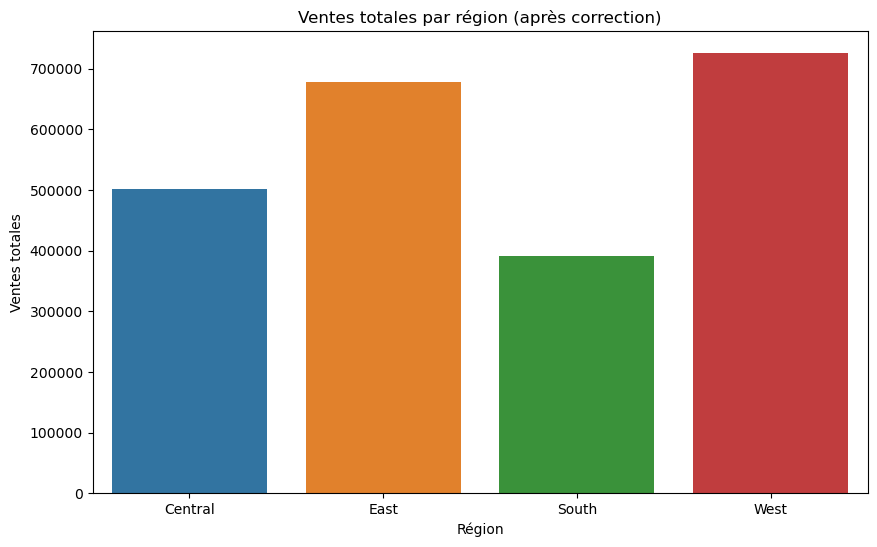

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Données des ventes par région (basées sur votre output)
data = {
    'region': ['Central', 'East', 'South', 'West'],
    'sales': [500947.92, 678499.99, 391822.62, 725457.93]
}
df_sales = pd.DataFrame(data)

# Création du graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='sales', data=df_sales, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Ventes totales par région (après correction)')
plt.xlabel('Région')
plt.ylabel('Ventes totales')
plt.show()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_1208\2476967378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sales', data=SuperStoreData, estimator=sum, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


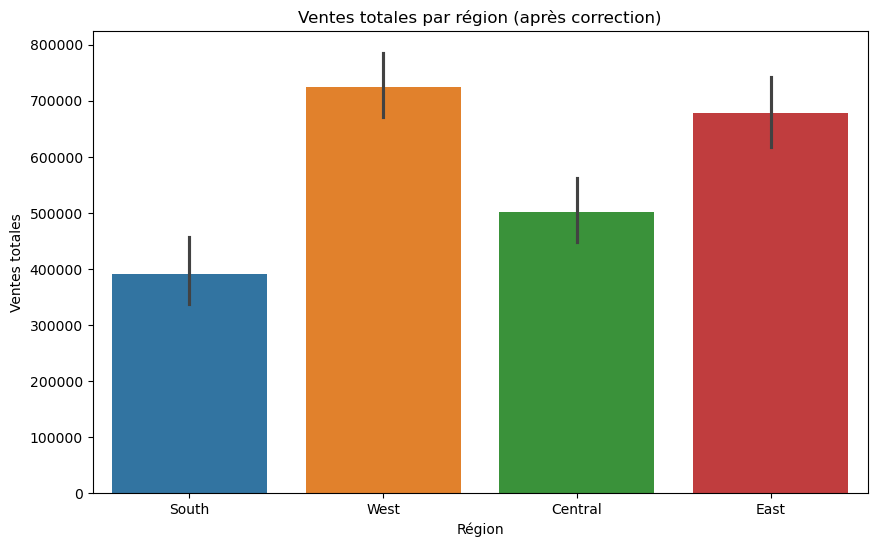

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='sales', data=SuperStoreData, estimator=sum, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Ventes totales par région (après correction)')
plt.xlabel('Région')
plt.ylabel('Ventes totales')
plt.show()

Corrélation entre sales et profit

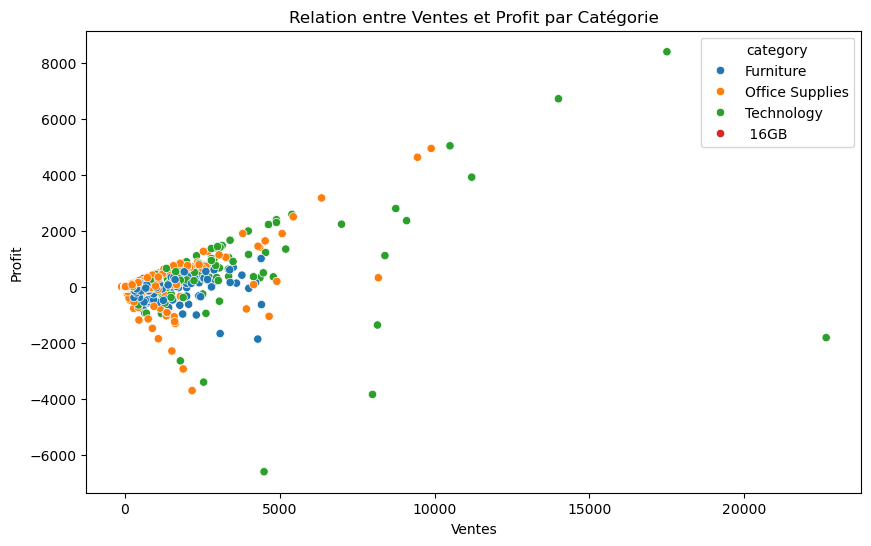

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=SuperStoreData, hue='category')
plt.title('Relation entre Ventes et Profit par Catégorie')
plt.xlabel('Ventes')
plt.ylabel('Profit')
plt.show()

Vérifiez les outliers : Les valeurs extrêmes dans sales (22 638.48) et profit (-6599.98, 8399.98) méritent une investigation

In [36]:
print(SuperStoreData[SuperStoreData['sales'] > SuperStoreData['sales'].quantile(0.99)])

            order_id  order_date   ship_date       ship_mode customer_id  \
27    US-2015-150630  17/09/2015  21/09/2015  Standard Class    TB-21521   
165   CA-2014-139892  08/09/2014  12/09/2014  Standard Class    BM-11140   
251   CA-2016-145625  11/09/2016  17/09/2016  Standard Class    KC-16540   
262   US-2014-106992  19/09/2014  21/09/2014    Second Class    SB-20290   
263   US-2014-106992  19/09/2014  21/09/2014    Second Class    SB-20290   
...              ...         ...         ...             ...         ...   
9649  CA-2016-107104  26/11/2016  30/11/2016  Standard Class    MS-17365   
9660  CA-2016-160717  06/06/2016  11/06/2016  Standard Class    ME-17320   
9741  CA-2015-117086  08/11/2015  12/11/2015  Standard Class    QJ-19255   
9857  CA-2015-164301  26/03/2015  30/03/2015  Standard Class    EB-13840   
9929  CA-2016-129630  04/09/2016  04/09/2016        Same Day    IM-15055   

              sales_rep          location_id       product_id    sales  \
27           

In [37]:
print(SuperStoreData[SuperStoreData['profit'].abs() > SuperStoreData['profit'].quantile(0.99)])

            order_id  order_date   ship_date       ship_mode customer_id  \
27    US-2015-150630  17/09/2015  21/09/2015  Standard Class    TB-21521   
149   CA-2016-114489  05/12/2016  09/12/2016  Standard Class    JE-16165   
165   CA-2014-139892  08/09/2014  12/09/2014  Standard Class    BM-11140   
215   CA-2015-146262  02/01/2015  09/01/2015  Standard Class    VW-21775   
251   CA-2016-145625  11/09/2016  17/09/2016  Standard Class    KC-16540   
...              ...         ...         ...             ...         ...   
9741  CA-2015-117086  08/11/2015  12/11/2015  Standard Class    QJ-19255   
9774  CA-2014-169019  26/07/2014  30/07/2014  Standard Class    LF-17185   
9857  CA-2015-164301  26/03/2015  30/03/2015  Standard Class    EB-13840   
9929  CA-2016-129630  04/09/2016  04/09/2016        Same Day    IM-15055   
9948  CA-2017-121559  01/06/2017  03/06/2017    Second Class    HW-14935   

              sales_rep          location_id       product_id    sales  \
27           

Sales par category

In [38]:
print(SuperStoreData.groupby('category')['sales'].sum())

category
 16GB                1926.92
Furniture          741718.61
Office Supplies    718855.75
Technology         834227.18
Name: sales, dtype: float64


Vérifier l’anomalie 16GB

In [39]:
print(SuperStoreData[SuperStoreData['category'] == '16GB'])

Empty DataFrame
Columns: [order_id, order_date, ship_date, ship_mode, customer_id, sales_rep, location_id, product_id, sales, quantity, discount, profit, customer_name, segment, product_name, category, sub_category, sales_team, sales_team_manager, city, state, postal_code, region]
Index: []

[0 rows x 23 columns]


In [40]:
print(SuperStoreData.groupby('category')['sales'].sum())

category
 16GB                1926.92
Furniture          741718.61
Office Supplies    718855.75
Technology         834227.18
Name: sales, dtype: float64


In [41]:
print(SuperStoreData['category'].unique())

['Furniture' 'Office Supplies' 'Technology' ' 16GB']


In [42]:
print(SuperStoreData[SuperStoreData['category'] == '16GB'])

Empty DataFrame
Columns: [order_id, order_date, ship_date, ship_mode, customer_id, sales_rep, location_id, product_id, sales, quantity, discount, profit, customer_name, segment, product_name, category, sub_category, sales_team, sales_team_manager, city, state, postal_code, region]
Index: []

[0 rows x 23 columns]


In [43]:
# Remplacer ' 16GB' (avec espace) par 'Technology'
SuperStoreData['category'] = SuperStoreData['category'].replace(' 16GB', 'Technology')

# Vérifier les catégories après correction
print(SuperStoreData['category'].unique())
print(SuperStoreData.groupby('category')['sales'].sum())

['Furniture' 'Office Supplies' 'Technology']
category
Furniture          741718.61
Office Supplies    718855.75
Technology         836154.10
Name: sales, dtype: float64


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_1208\1951936203.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='sales', data=sales_by_category, palette=['#1f77b4', '#ff7f0e', '#2ca02c'])


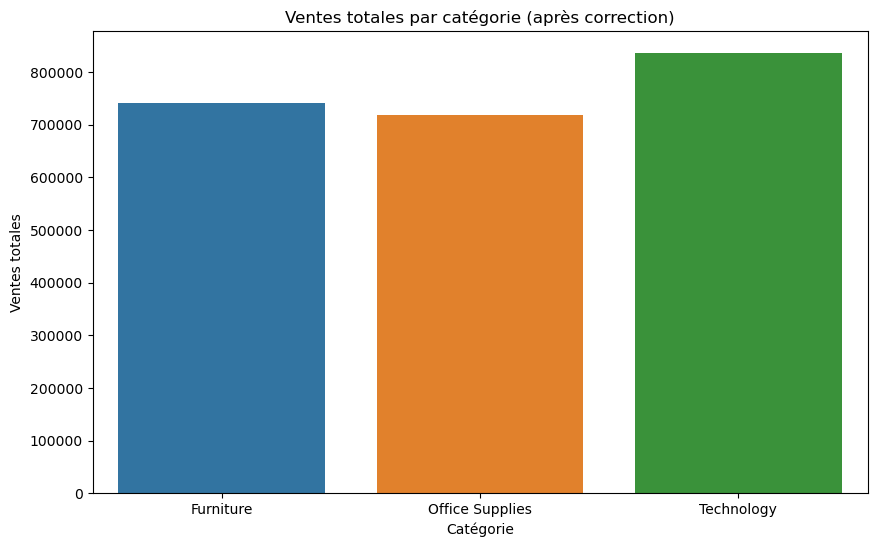

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des ventes par catégorie après correction
sales_by_category = SuperStoreData.groupby('category')['sales'].sum().reset_index()

# Création du graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='sales', data=sales_by_category, palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Ventes totales par catégorie (après correction)')
plt.xlabel('Catégorie')
plt.ylabel('Ventes totales')
plt.show()

In [46]:
# Profits par catégorie
print(SuperStoreData.groupby('category')['profit'].sum())

category
Furniture           18463.31
Office Supplies    122490.88
Technology         145455.66
Name: profit, dtype: float64


In [47]:
# Outliers
print(SuperStoreData[SuperStoreData['sales'] > SuperStoreData['sales'].quantile(0.99)])

            order_id  order_date   ship_date       ship_mode customer_id  \
27    US-2015-150630  17/09/2015  21/09/2015  Standard Class    TB-21521   
165   CA-2014-139892  08/09/2014  12/09/2014  Standard Class    BM-11140   
251   CA-2016-145625  11/09/2016  17/09/2016  Standard Class    KC-16540   
262   US-2014-106992  19/09/2014  21/09/2014    Second Class    SB-20290   
263   US-2014-106992  19/09/2014  21/09/2014    Second Class    SB-20290   
...              ...         ...         ...             ...         ...   
9649  CA-2016-107104  26/11/2016  30/11/2016  Standard Class    MS-17365   
9660  CA-2016-160717  06/06/2016  11/06/2016  Standard Class    ME-17320   
9741  CA-2015-117086  08/11/2015  12/11/2015  Standard Class    QJ-19255   
9857  CA-2015-164301  26/03/2015  30/03/2015  Standard Class    EB-13840   
9929  CA-2016-129630  04/09/2016  04/09/2016        Same Day    IM-15055   

              sales_rep          location_id       product_id    sales  \
27           

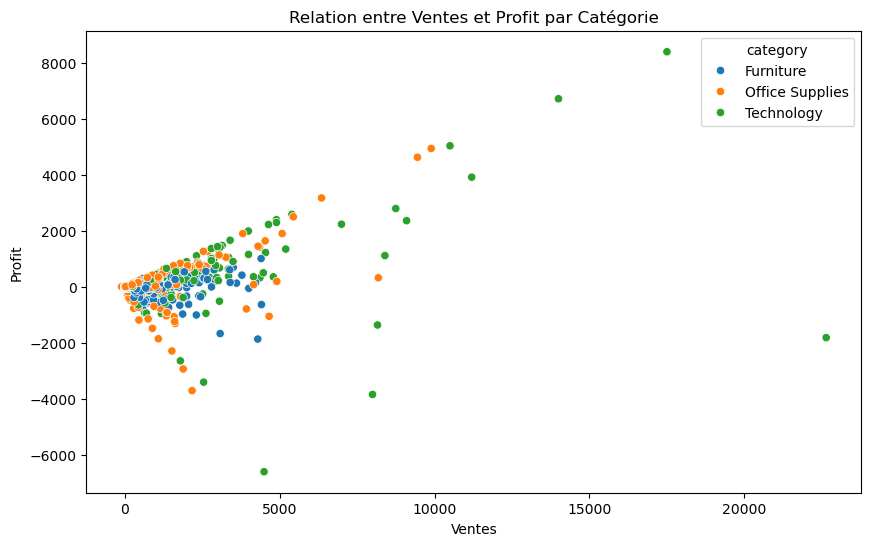

In [48]:
# Relation sales/profit 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=SuperStoreData, hue='category')
plt.title('Relation entre Ventes et Profit par Catégorie')
plt.xlabel('Ventes')
plt.ylabel('Profit')
plt.show()

In [11]:
print("La part des femmes :", round(customers.describe(include = 'all').loc["freq","sex"] / 
      customers.describe(include = 'all').loc["count","sex"]), "%")

La part des femmes : 1 %


In [10]:
print("La part des femmes :", round(customers.describe(include = 'all').loc["freq","sex"] / 
      customers.describe(include = 'all').loc["count","sex"],2), "%")

La part des femmes : 0.52 %


In [15]:
#calculons l'age moyen par sexe 

# 2022 - customers.groupby("sex").mean()

age_moyen_par_sexe = 2025 - customers.groupby("sex")["birth"].mean().round()
print("Âge moyen par sexe :\n" + age_moyen_par_sexe.to_string() + "ans")

Âge moyen par sexe :
sex
f    47.0
m    46.0ans


L'âge moyen des femmes est de 44 ans et celui des hommes est de 43 ans

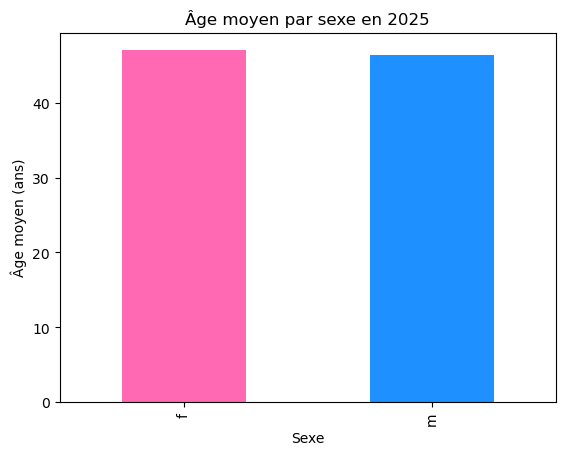

In [31]:
age_moyen_par_sexe = 2025 - customers.groupby("sex")["birth"].mean()
age_moyen_par_sexe.plot(kind="bar", color=["#FF69B4", "#1E90FF"])
plt.title("Âge moyen par sexe en 2025")
plt.xlabel("Sexe")
plt.ylabel("Âge moyen (ans)")
plt.show()

Le fichier customers n'a pas de valeurs nulles ni de doublons.


### 1.1.2 - products

In [6]:
# Ouverture du fichier

products = pd.read_csv('produits.csv')

In [7]:
# Affichage des informations 

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [27]:
# Affichage des premières lignes

products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [35]:
# valeurs manquantes en boolean
products.isna()

,id_prod,price,categ
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3282,False,False,False
3283,False,False,False
3284,False,False,False
3285,False,False,False


In [32]:
# valeurs manquantes en moyenne
products.isna().mean()


id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [33]:
# valeurs manquantes en somme
products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [36]:
# Doublons en boolean
products.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3282    False
3283    False
3284    False
3285    False
3286    False
Length: 3287, dtype: bool

In [37]:
#Doublon
products.duplicated().sum()


np.int64(0)

In [38]:
# Stats du dataframe
products.describe(include = 'all')



,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1920,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [18]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


Votre conclusion ?



Je constate qu'il y a un produit avec un prix négatif (-1) _ cela pourrait être une erreur de saisie ou une donnée anormale à vérifier, car un prix négatif n’a pas de sens dans la plupart des contextes commerciaux.
La ligne count est 3287 pour toutes les colonnes (id_prod, price, categ). Cela signifie qu’il y a 3287 produits au total, et aucune donnée ne manque dans ces colonnes (pas de NaN dans count).
Le jeu de données est complet pour ces trois colonnes, ce qui est une bonne chose pour l’analyse.
Chaque id_prod est unique (pas de doublons), car le nombre d’éléments uniques égale le nombre total de produits. Cela signifie que chaque produit a un identifiant distinct, ce qui est normal pour une colonne d’identification.
Les prix varient énormément, de -1 à 300, avec une moyenne d’environ 21.86 €.
L’écart-type élevé (29.85) montre que les prix sont très dispersés.
La moitié des produits (entre 25% et 75%) ont des prix entre 6.99 € et 22.99 €, ce qui suggère que les prix extrêmes (négatifs ou très élevés) sont des cas rares.

Je constate qu'il y a un produit avec un prix négatif (-1), ce qui pourrait être une erreur de saisie ou une donnée anormale à vérifier, car un prix négatif n’a pas de sens dans la plupart des cas.

De plus :

Il y a 3287 produits au total, et aucune donnée ne manque dans les colonnes id_prod, price, et categ.
Chaque id_prod est unique, ce qui est normal pour une colonne d’identification.
Les prix varient de -1 à 300 €, avec une moyenne d’environ 21.86 €. La moitié des produits ont des prix entre 6.99 € et 22.99 €, et l’écart-type élevé (29.85) montre une grande dispersion.
La colonne categ semble contenir des catégories codées en nombres [0 1 2] ou (0, 1, 2), avec la majorité des produits dans la catégorie 0 (médiane = 0).
Le premier chiffre de l'id produit correspond à la catégorie

In [41]:
print(products)

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3287 rows x 3 columns]


In [43]:
print(products.categ.value_counts())

categ
0    2309
1     739
2     239
Name: count, dtype: int64


In [44]:
print(products.categ)

0       0
1       0
2       0
3       1
4       0
       ..
3282    2
3283    0
3284    0
3285    1
3286    0
Name: categ, Length: 3287, dtype: int64


In [45]:
print(products.columns)

Index(['id_prod', 'price', 'categ'], dtype='object')


In [46]:
print(products["categ"].unique())

[0 1 2]


In [8]:
# calculer le prix moyen des produits par catégorie
prix_moyen_par_categ = products.groupby("categ")["price"].mean()
print("Prix moyen par catégorie :\n", prix_moyen_par_categ)

Prix moyen par catégorie :
 categ
0     11.727280
1     25.531421
2    108.354686
Name: price, dtype: float64


Le prix moyen par catégorie est :

* Catégorie 0  =>  11.727280 €,
* Catégorie 1  =>  25.531421 €,
* Catégorie 2  =>  108.354686 €.

Cela montre que les prix augmentent avec le numéro de la catégorie, et la catégorie 0, qui contient 2309 produits (la majorité), a le prix moyen le plus bas.

Observation :

Le prix moyen augmente avec le numéro de la catégorie (0 < 1 < 2), ce qui pourrait indiquer que les catégories représentent des niveaux de gamme (bas, moyen, haut).
La catégorie 2 a un prix moyen beaucoup plus élevé, ce qui suggère qu’elle contient des produits plus chers (peut-être des produits de luxe ou premium).

### Graphiques

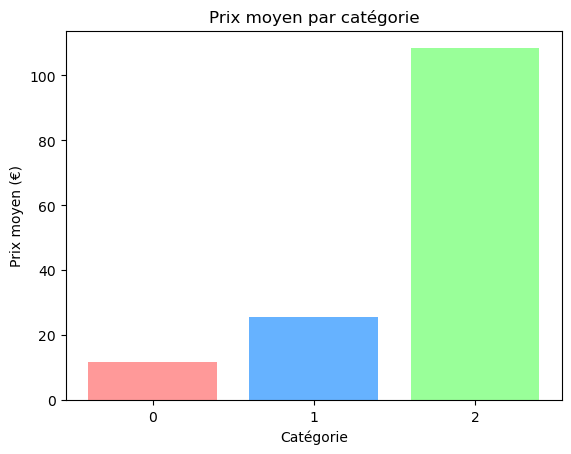

In [48]:
# Données
categories = [0, 1, 2]
prix_moyen = [11.73, 25.53, 108.35]

# Créer le graphique
plt.bar(categories, prix_moyen, color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title("Prix moyen par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Prix moyen (€)")
plt.xticks(categories)
plt.show()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_3264\289581067.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categ', y='prix_moyen', data=data, palette=['#FF9999', '#66B2FF', '#99FF99'])


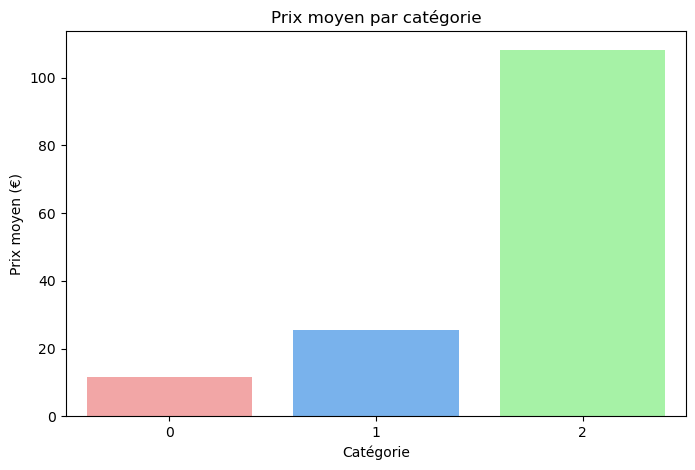

In [ ]:
# Données dans un DataFrame pour seaborn
data = pd.DataFrame({'categ': [0, 1, 2], 'prix_moyen': [11.73, 25.53, 108.35]})

# Créer le graphique
plt.figure(figsize=(8, 5))
sns.barplot(x='categ', y='prix_moyen', data=data, palette=['#FF9999', '#66B2FF', '#99FF99'])
plt.title("Prix moyen par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Prix moyen (€)")
plt.show()

Le prix moyen par catégorie est :

* Catégorie 0  =>  11.73 €,
* Catégorie 1 => 25.53 €,
* Catégorie 2 => 108.35 €.

J’ai créé un graphique à barres (voir ci-dessus) pour comparer ces prix. On remarque que le prix moyen augmente avec le numéro de la catégorie, et la catégorie 2, avec un prix moyen de 108.35 €, contient probablement des produits premium, malgré son faible nombre (239 produits).

In [50]:
prix_moyen_par_categ = products[products["price"] >= 0].groupby("categ")["price"].mean().round(2)
print("Prix moyen par catégorie (sans prix négatifs) :\n", prix_moyen_par_categ, "€")

Prix moyen par catégorie (sans prix négatifs) :
 categ
0     11.73
1     25.53
2    108.35
Name: price, dtype: float64 €


Distribution des prix

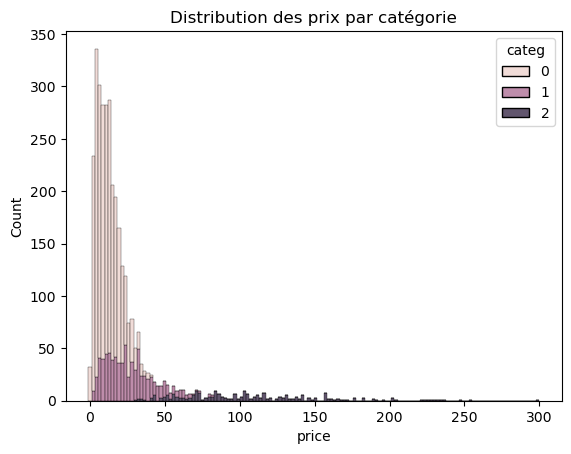

In [51]:
sns.histplot(data=products, x="price", hue="categ", multiple="stack")
plt.title("Distribution des prix par catégorie")
plt.show()

### 1.1.3 - transactions


In [9]:
# Ouverture du fichier
# sales = pd.read_csv('ventes.csv')
transactions = pd.read_csv('ventes.csv')

In [10]:
# Affichage des informations 
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [54]:
# Affichage des premières lignes
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [55]:
# Stats du dataframe
transactions.describe(include = 'all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


* Je remarque une fréquence très élevé de 25488 pour le client_id c_1609 
* ensuite la session_id s_0 apparait 200 fois dans le dataframe
* je note aussi le id_prod 1_369 apparait 2252 fois
* Pour client_id c_1609 => "Le client_id c_1609 a effectué 25488 transactions, soit environ 3.75 % des 679532 transactions totales, ce qui en fait un client très actif."
* Pour id_prod 1_369 => "Le produit 1_369 apparaît 2252 fois, soit environ 0.33 % des transactions totales, mais c’est beaucoup pour un seul produit parmi 3267 uniques."
* Pour session_id s_0 => "La session_id s_0 apparaît 200 fois, ce qui représente environ 0.06 % des 342316 sessions uniques, mais cela reste notable pour une seule session."
-------------
* "Le client_id c_1609 pourrait être un compte professionnel ou une erreur de duplication."
* "La session_id s_0 pourrait indiquer une session mal enregistrée ou une activité intense sur une période."
* "Le id_prod 1_369 pourrait être un produit phare ou un article promotionnel très acheté."

In [56]:
#valeurs manquantes
transactions.isna().mean()

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [14]:
#Doublon
transactions.duplicated().sum()

np.int64(126)

Votre conclusion ?

Qu'est-ce qu'on remarque ? 

En analysant les statistiques de transactions.describe(include='all'), je constate :

* Une fréquence très élevée de 25488 pour le client_id c_1609, soit environ 3.75 % des 679532 transactions totales. Cela pourrait indiquer un gros acheteur ou une possible erreur de duplication à vérifier.
* La session_id s_0 apparaît 200 fois, ce qui représente environ 0.06 % des 342316 sessions uniques. Cela pourrait suggérer une session prolongée ou une anomalie dans les données.
* Le id_prod 1_369 apparaît 2252 fois, soit 0.33 % des transactions, ce qui en fait un produit très populaire, peut-être un best-seller.
* La date "test_2021-03-01 02:30:02.237413" apparaît 13 fois, ce qui pourrait être une donnée de test à investiguer.
* Il y a 8602 clients uniques et 3267 produits uniques, avec un total de 679532 transactions, et aucune valeur manquante.

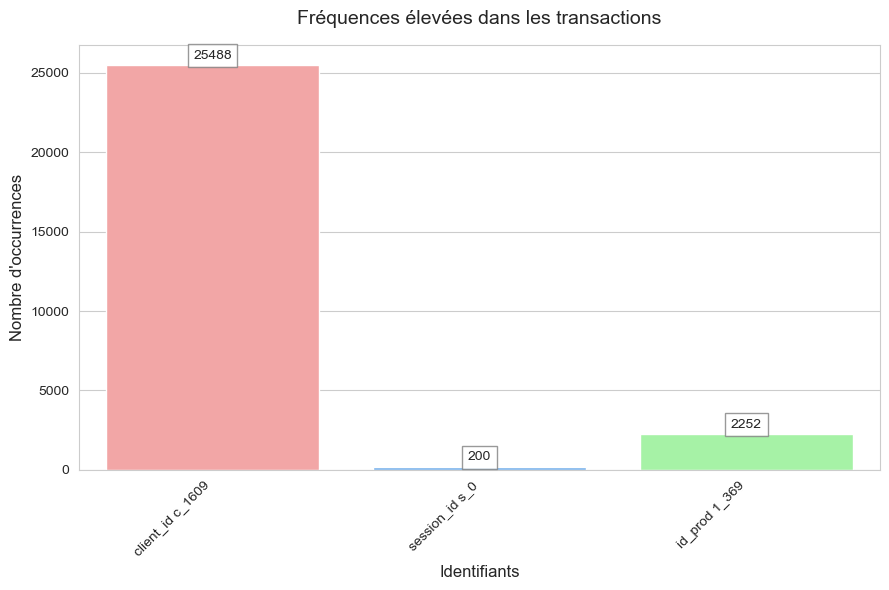

In [15]:
# Données
data = pd.DataFrame({
    'Identifiant': ['client_id c_1609', 'session_id s_0', 'id_prod 1_369'],
    'Frequence': [25488, 200, 2252]
})

# Appliquer un style avec grille en fond
sns.set_style("whitegrid")

# Créer le graphique
plt.figure(figsize=(9, 6))  # Taille légèrement plus grande pour lisibilité

# Utiliser hue avec la variable x et désactiver la légende
sns.barplot(x='Identifiant', y='Frequence', hue='Identifiant', data=data, 
            palette=['#FF9999', '#66B2FF', '#99FF99'], legend=False)

# Personnalisation
plt.title("Fréquences élevées dans les transactions", fontsize=14, pad=15)
plt.xlabel("Identifiants", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation et alignement à droite
plt.yticks(fontsize=10)

# Ajouter les chiffres au-dessus des barres
for i, v in enumerate(data['Frequence']):
    plt.text(i, v + 200, str(v), ha='center', va='bottom', fontsize=10, 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Ajuster l'espacement et afficher
plt.tight_layout()
plt.show()

* Ce graphique à barres, créé avec Seaborn, montre les fréquences élevées dans les transactions. 
* Le client_id c_1609 domine avec 25488 occurrences, suivi par le id_prod 1_369 (2252) et la session_id s_0 (200). 
* La grille et les annotations facilitent la lecture des différences.

In [16]:
# retirer les lignes identifiées
# Objectif __ Retirer les lignes où :
# client_id est égal à "c_1609", session_id est égal à "s_0", 
# id_prod est égal à "1_369".

# Créer un nouveau DataFrame sans les lignes identifiées
transactions_cleaned = transactions[
    (transactions["client_id"] != "c_1609") & 
    (transactions["session_id"] != "s_0") & 
    (transactions["id_prod"] != "1_369")
]

# Vérifications
print("Nombre de lignes avant :", len(transactions))
print("Nombre de lignes après :", len(transactions_cleaned))

# Compter les lignes retirées (pour info)
lignes_a_retirer = len(transactions) - len(transactions_cleaned)
print("Nombre de lignes retirées :", lignes_a_retirer)

# Vérifier les fréquences dans le nouveau DataFrame
print("\nFréquences de client_id après filtrage :")
print(transactions_cleaned["client_id"].value_counts().head())
print("\nFréquences de session_id après filtrage :")
print(transactions_cleaned["session_id"].value_counts().head())
print("\nFréquences de id_prod après filtrage :")
print(transactions_cleaned["id_prod"].value_counts().head())

Nombre de lignes avant : 679532
Nombre de lignes après : 651651
Nombre de lignes retirées : 27881

Fréquences de client_id après filtrage :
client_id
c_6714    9167
c_3454    6728
c_4958    5186
c_2140     402
c_3263     398
Name: count, dtype: int64

Fréquences de session_id après filtrage :
session_id
s_118668    14
s_96857     13
s_21005     13
s_215292    13
s_342045    13
Name: count, dtype: int64

Fréquences de id_prod après filtrage :
id_prod
1_414    2141
1_417    2140
1_498    2077
1_425    2053
1_403    1922
Name: count, dtype: int64


In [17]:
print("\nVérification des identifiants retirés :")
print("client_id c_1609 :", transactions_cleaned[transactions_cleaned["client_id"] == "c_1609"].shape[0])
print("session_id s_0 :", transactions_cleaned[transactions_cleaned["session_id"] == "s_0"].shape[0])
print("id_prod 1_369 :", transactions_cleaned[transactions_cleaned["id_prod"] == "1_369"].shape[0])


Vérification des identifiants retirés :
client_id c_1609 : 0
session_id s_0 : 0
id_prod 1_369 : 0


* J'ai corrigé une erreur dans mon code et remplacé .value par .value_counts(). 
* Après avoir retiré les lignes avec client_id c_1609, session_id s_0, et id_prod 1_369, le nouveau DataFrame transactions_cleaned contient [651651] lignes. 
* Les vérifications confirment que ces identifiants ne sont plus présents.

In [18]:
# Calculer le nombre d'achats par client avec groupby et calculer ensuite le nombre d'achats moyen
# Calculer le nombre d'achats par client
achats_par_client = transactions_cleaned.groupby("client_id").size()

# Afficher les 5 premiers pour vérification
print("Nombre d'achats par client (5 premiers) :\n", achats_par_client.head())

# Calculer le nombre moyen d'achats par client
nombre_moyen_achats = achats_par_client.mean()

# Afficher le résultat arrondi
print("\nNombre moyen d'achats par client :", round(nombre_moyen_achats, 2))


Nombre d'achats par client (5 premiers) :
 client_id
c_1        39
c_10       58
c_100       8
c_1000    119
c_1001    102
dtype: int64

Nombre moyen d'achats par client : 75.78


In [19]:
print("Somme totale des achats :", achats_par_client.sum())
print("Nombre total de lignes :", len(transactions_cleaned))

Somme totale des achats : 651651
Nombre total de lignes : 651651


In [20]:
achats_par_client_original = transactions.groupby("client_id").size()
print("Nombre moyen d'achats par client (original) :", round(achats_par_client_original.mean(), 2))

Nombre moyen d'achats par client (original) : 79.0


J'ai calculé le nombre d'achats par client en utilisant groupby sur client_id avec .size(). Voici les 5 premiers résultats : 
* [Nombre d'achats par client (5 premiers) :
 client_id
c_1        39
c_10       58
c_100       8
c_1000    119
c_1001    102
dtype: int64]. 
* Le nombre moyen d'achats par client est de [Nombre moyen d'achats par client (original) : 79.0]. 
* Après avoir retiré les lignes avec client_id c_1609, session_id s_0, et id_prod 1_369, cette moyenne reflète mieux la distribution typique des achats.

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9720\3006085448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


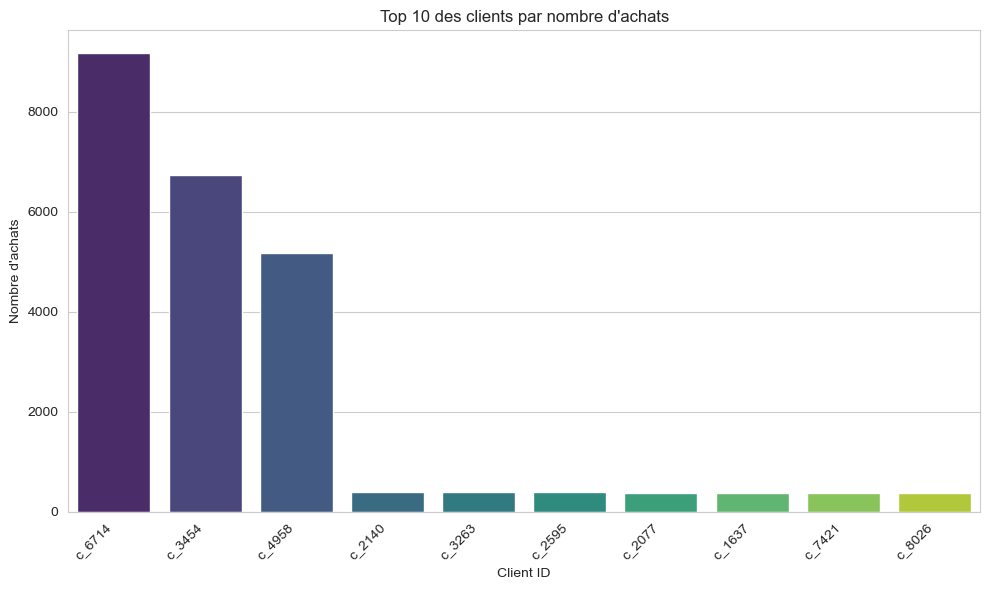

In [21]:
# Top 10 des clients par achats
top_10 = achats_par_client.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')
plt.title("Top 10 des clients par nombre d'achats")
plt.xlabel("Client ID")
plt.ylabel("Nombre d'achats")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

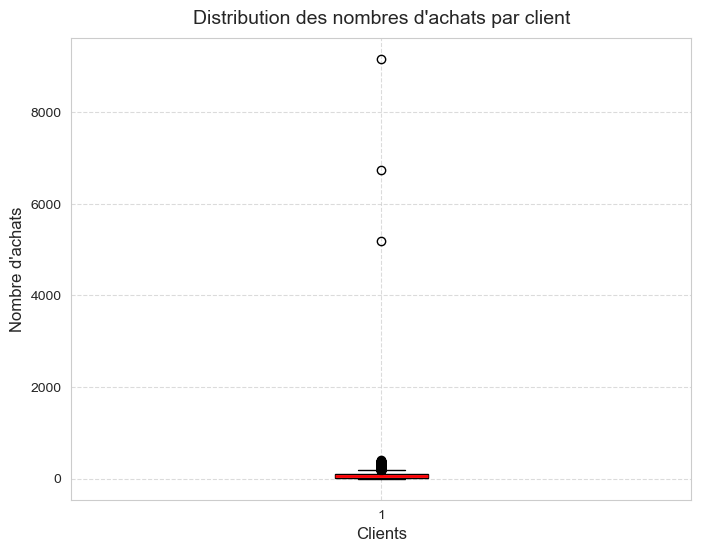

Médiane des achats : 51.0
Moyenne des achats : 75.78
Écart-type des achats : 149.63


In [22]:
# tracer un boxplot pour voir la distribution, voux pouvez utiliser plt.boxplot()
import matplotlib.pyplot as plt

# Calculer le nombre d'achats par client
achats_par_client = transactions_cleaned.groupby("client_id").size()

# Convertir en liste
achats_liste = achats_par_client.values

# Créer le boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(achats_liste, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='#99CCFF', color='black'),
            medianprops=dict(color='red', linewidth=2))

# Personnalisation
plt.title("Distribution des nombres d'achats par client", fontsize=14, pad=10)
plt.ylabel("Nombre d'achats", fontsize=12)
plt.xlabel("Clients", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks(fontsize=10)

# Afficher
plt.show()

# Stats pour vérification
print("Médiane des achats :", achats_par_client.median())
print("Moyenne des achats :", round(achats_par_client.mean(), 2))
print("Écart-type des achats :", round(achats_par_client.std(), 2))

In [23]:
print("Médiane des achats :", achats_par_client.median())
print("Moyenne des achats :", round(achats_par_client.mean(), 2))

Médiane des achats : 51.0
Moyenne des achats : 75.78


Qu'est-ce qu'on remarque ? 


J'ai tracé un boxplot avec plt.boxplot() pour visualiser la distribution des nombres d'achats par client après avoir retiré les lignes avec client_id c_1609, session_id s_0, et id_prod 1_369. On remarque que la médiane est de [51.0], la moyenne de [75.78], et il y a des outliers au-delà de [149.63], suggérant une distribution asymétrique avec quelques clients très actifs. La boîte et les moustaches montrent une variabilité importante dans les achats.

## 1.2 - Jointure des dataframes

1.2.1 - products & transactions

In [34]:
# Jointure entre transactions et products en prenant comme clé la colonne 'id_prod'
# jointure externe 
# afin de conserver toutes les lignes de mon fichier transactions.

df_final = pd.merge(transactions,products, on = 'id_prod', how= 'outer',indicator=True)

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679553 entries, 0 to 679552
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679553 non-null  object  
 1   date        679532 non-null  object  
 2   session_id  679532 non-null  object  
 3   client_id   679532 non-null  object  
 4   price       679332 non-null  float64 
 5   categ       679332 non-null  float64 
 6   _merge      679553 non-null  category
dtypes: category(1), float64(2), object(4)
memory usage: 31.8+ MB


In [39]:
#regardons les cas où le produit n'est pas vendu

df_final[df_final._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,_merge
6073,0_1014,NaN,NaN,NaN,1.15,0.0,right_only
6511,0_1016,NaN,NaN,NaN,35.06,0.0,right_only
8723,0_1025,NaN,NaN,NaN,24.99,0.0,right_only
21687,0_1062,NaN,NaN,NaN,20.08,0.0,right_only
40971,0_1119,NaN,NaN,NaN,2.99,0.0,right_only
94245,0_1318,NaN,NaN,NaN,20.92,0.0,right_only
297077,0_1620,NaN,NaN,NaN,0.80,0.0,right_only
299185,0_1624,NaN,NaN,NaN,24.50,0.0,right_only
311123,0_1645,NaN,NaN,NaN,2.99,0.0,right_only
323013,0_1780,NaN,NaN,NaN,1.67,0.0,right_only


In [42]:
print("les produits qui ne sont pas vendus",df_final[df_final._merge=="right_only"].id_prod.unique())

les produits qui ne sont pas vendus ['0_1014' '0_1016' '0_1025' '0_1062' '0_1119' '0_1318' '0_1620' '0_1624'
 '0_1645' '0_1780' '0_1800' '0_2308' '0_299' '0_310' '0_322' '0_510' '1_0'
 '1_394' '2_72' '2_86' '2_87']


In [44]:
#on supprime les produits invendus

index = df_final[df_final._merge=="right_only"].index

df_final.drop(index, inplace = True)

df_final[df_final._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,_merge


In [45]:
#regardons les cas où le produit dans transaction n'est pas trouvé dans products
df_final[df_final._merge=="left_only"]

,id_prod,date,session_id,client_id,price,categ,_merge
380106,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
380107,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
380108,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
380109,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
380110,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
380322,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,left_only
380323,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,left_only
380324,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,left_only
380325,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,left_only


In [46]:
df_final[df_final._merge=="left_only"].describe(include = "all")

,id_prod,date,session_id,client_id,price,categ,_merge
count,221,221,221,221,0.0,0.0,221
unique,1,221,221,100,NaN,NaN,1
top,0_2245,2022-09-23 07:22:38.636773,s_272266,c_1533,NaN,NaN,left_only
freq,221,1,1,6,NaN,NaN,221
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Un produit a été vendu 221 fois, mais on ne connait pas son prix.
Plusieurs possibilités : 

    - on supprime les lignes -> on sous-estimera le CA
    
    - on fait une imputation 

In [47]:
# faisons une imputation 

index = df_final[df_final._merge=="left_only"].index #on récupère l'index des lignes qu'il faut modifier 

df_final.loc[index,"price"] = 11.7

df_final.loc[index,"categ"] = 0


### 1.2.1 - ajout de customers

In [66]:
Real = pd.merge(df_final, customers, on="client_id", how="outer", indicator=True)   #indicator=True crée la colonne merge pour s'y référer
Real.head(-20)

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
0,0_1090,2021-12-19 02:44:12.827475,s_136532,c_1,13.78,0.0,m,1955,both
1,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,m,1955,both
2,0_1186,2022-08-25 12:17:34.446678,s_258252,c_1,12.30,0.0,m,1955,both
3,0_1378,2021-08-23 16:56:15.401655,s_79696,c_1,13.96,0.0,m,1955,both
4,0_1378,2022-07-23 16:56:15.401655,s_242617,c_1,13.96,0.0,m,1955,both
...,...,...,...,...,...,...,...,...,...
679528,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1,-1.00,0.0,m,2001,both
679529,T_0,test_2021-03-01 02:30:02.237440,s_0,ct_1,-1.00,0.0,m,2001,both
679530,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1,-1.00,0.0,m,2001,both
679531,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1,-1.00,0.0,m,2001,both


In [67]:
Real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679553 entries, 0 to 679552
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679532 non-null  object  
 1   date        679532 non-null  object  
 2   session_id  679532 non-null  object  
 3   client_id   679553 non-null  object  
 4   price       679532 non-null  float64 
 5   categ       679532 non-null  float64 
 6   sex         679553 non-null  object  
 7   birth       679553 non-null  int64   
 8   _merge      679553 non-null  category
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 42.1+ MB


In [68]:
Real.isnull().sum()

id_prod       21
date          21
session_id    21
client_id      0
price         21
categ         21
sex            0
birth          0
_merge         0
dtype: int64

Il y a donc 21 valeurs nulles dans le df Real

In [ ]:
# Vérifier si des ventes concernent des clients absents de customers 
Real[Real._merge=="left_only"]

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge


In [70]:
# Vérifier si des clients n'ont fait aucun achat
Real[Real._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
18130,NaN,NaN,NaN,c_1223,NaN,NaN,m,1963,right_only
165377,NaN,NaN,NaN,c_2706,NaN,NaN,f,1967,right_only
189365,NaN,NaN,NaN,c_3017,NaN,NaN,f,1992,right_only
223199,NaN,NaN,NaN,c_3443,NaN,NaN,m,1959,right_only
237394,NaN,NaN,NaN,c_3526,NaN,NaN,m,1956,right_only
257888,NaN,NaN,NaN,c_3789,NaN,NaN,f,1997,right_only
278852,NaN,NaN,NaN,c_4086,NaN,NaN,f,1992,right_only
302230,NaN,NaN,NaN,c_4358,NaN,NaN,m,1999,right_only
305396,NaN,NaN,NaN,c_4406,NaN,NaN,f,1998,right_only
308972,NaN,NaN,NaN,c_4447,NaN,NaN,m,1956,right_only


In [71]:
# on stocke ces clients sur un df à part.
dormantCustomers = Real[Real._merge=="right_only"]

In [72]:
#on supprime les clients radins/décédés/infidèles ...

index = Real[Real._merge=="right_only"].index

Real.drop(index, inplace=True)

Real[Real._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge


In [73]:
Real.info()
Real.shape

<class 'pandas.core.frame.DataFrame'>
Index: 679532 entries, 0 to 679552
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679532 non-null  object  
 1   date        679532 non-null  object  
 2   session_id  679532 non-null  object  
 3   client_id   679532 non-null  object  
 4   price       679532 non-null  float64 
 5   categ       679532 non-null  float64 
 6   sex         679532 non-null  object  
 7   birth       679532 non-null  int64   
 8   _merge      679532 non-null  category
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 47.3+ MB


(679532, 9)

# 2 Analyse globale du CA

In [ ]:
df_final.head()

In [66]:
# calculer le CA total



## 2.1 Traitement de la date

On aimerait pouvoir faire des analyses du CA par an, par mois, par jour de la semaine, par catégorie de produit.
On s'occupera des analyses des usages de clients dans le chapitre 3 

On a besoin de traiter la date pour pouvoir faire ces analyses. 
On va créer des nouvelles colonnes à parti de ce champ

In [ ]:
# Modification du type de ma colonne date
df_final['date'] = pd.to_datetime(df_final['date'])

In [ ]:
df_final['année'] = df_final['date'].dt.year

In [ ]:
df_final.head()

En vous inspirant de ce qu'on vient de faire, créer :

    un champ mois

    un champ jour du mois

    un champ jour de la semaine


In [ ]:
# A vous de jouer




## 2.2 Analyse calendaire

In [ ]:
#Calcule du CA par année
df_final.groupby("année").price.sum()

In [ ]:
df_final.groupby("année").price.sum().plot(kind = "bar", title="CA par année",ylabel="CA")

En vous inspirant de ce qu'on vient de faire :

- Etudier le CA par mois. Qu'observons nous ? 

- Est-ce qu'il y a un effet fin de mois ? ou début de mois ?

- Est-ce qu'il y a un effet WE? 





In [57]:
# A vous de jouer





## 2.3 Analyse par catégorie



In [60]:
# reprendre le travail ci-dessous et le détailler par categorie




# 3 Analyse des usages des clients

## 3.1 Traitement de l'âge 

In [ ]:
#créons  une colonne âge
df_final['Age'] = 2022 - df_final['birth']

In [ ]:
df_final.groupby("client_id").mean().Age.hist(bins=40)

plt.title("Répartition des clients par âge")

plt.xlabel("Age")

plt.ylabel("Nombre de clients")

Pour analyser les usages liés à l'âge, il est souvent plus pertinent de faire des tranches d'âge



In [ ]:
# On va créer 14 intervalles d'âges :

labels = ['19-24','25-29','30-35','36-40','41-45','46-51','52-56','57-61','62-67','68-72','73-77','78-83','84-88','89-94']


df_final['Age_tranche']= pd.cut(df_final['Age'], 14,labels=labels)

## 3.2 Analyse du chiffre d'affaires par client

In [ ]:
# le nombre de clients uniques
df_final.client_id.value_counts().shape

In [ ]:
# on regroupe mes données par client_id et on calcul le montant de leurs achats.
df_client = df_final.groupby('client_id')[['price']].sum();
df_client.head()

Analyser le chiffre d'affaires par client : 

- est ce qu'il y a des outliers ? 
- si oui, quelle part du CA ils représentent ?
- que peut-on supposer à leur sujet ? Comment les traiter dans notre analyse 
- étudier la distribution du CA par client en dehors de ces clients

In [68]:
# A vous de jouer



## 3.3 Analyse des usages d'achat liés au sexe

### 3.3.1 Calculer le CA par sexe

In [69]:
# A vous de jouer

### 3.3.2 Corrélation : Sexe et Catégorie

Les deux variables sont qualitatives.
On va réaliser le test du Khi² pour vérifier si ces deux variables sont liées.

In [ ]:
# Création de ma table de contingence
X = "sex"
Y = "categ"

cont_1 = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

In [ ]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(df_final)
indep = round(tx.dot(ty) / n)

In [ ]:
# regardons où l'écart est le plus important
(cont_1 - indep)/indep

In [ ]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [ ]:
chi2, p = chi2_contingency(cont_1)

In [ ]:
chi2

Avec une p-value inférieure à 0.05% on peut rejeter l'hypothèse 0 d'indépendance.

In [ ]:
import seaborn as sns


c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

On remarque une forte corrélation entre les hommes et la catégorie 1.

### 3.3.3 Test de corrélation : sexe et nombre d'achats

In [ ]:
nb_achats = df_final.groupby(["client_id","sex"],as_index=False)[["session_id"]].count()

In [ ]:
nb_achats[['sex','session_id']].hist(by='sex',alpha = 0.5, bins = 50, sharex=True)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
lm = ols('session_id ~ sex', data = nb_achats).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)

In [ ]:
table

In [ ]:
lm.summary()

## 3.4 Analyse des usages d'achat liés à l'âge¶

### 3.4.1 Corrélation âge et CA

On peut considérer l'âge comme une variable quantitative. Le CA l'est aussi. 

In [ ]:
df_age_ca = df_final[['Age','price']]

In [ ]:
df_age_ca = df_age_ca.groupby('Age').agg({'price':'sum'}).reset_index()

In [ ]:
df_age_ca

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_age_ca["Age"],df_age_ca["price"],'o')
plt.xlabel("Age")
plt.ylabel("ca")
plt.grid()
plt.title('Répartition du CA par âge')
plt.show()

In [ ]:
#corrélation de pearson 
df_age_ca.corr()

In [ ]:
#test sperman
from scipy import stats
from scipy.stats import spearmanr

In [ ]:
stats.spearmanr(df_age_ca['Age'],df_age_ca['price'])

In [ ]:
df_age_ca.corr( method = "spearman")

### 3.4.2 corrélation tranche d'âge et catégorie de produit

In [80]:
#A vous de jouer 

### 3.4.3 corrélation tranche d'âge et fréquence d'achat

### 3.4.4 corrélation tranche d'âge et Panier moyen

# 4 synthèse